<a href="https://colab.research.google.com/github/amitagar1/EVA2.0/blob/master/Copy_of_Snehal_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

In [0]:
from google.colab import auth
auth.authenticate_user()

In [0]:
from google.colab import files
files.upload()

In [0]:
import os
import pandas as pd
import numpy as np 
import gc
import time
import imutils
from matplotlib import pyplot as plt 
import seaborn as sns #visualisation
%matplotlib inline 
sns.set(color_codes=True)
plt.rcParams['figure.figsize'] = (8.0, 6.0)
from scipy import stats
from scipy.stats import norm
import csv

In [0]:
from scipy.sparse import csr_matrix, hstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.linear_model import Ridge

https://medium.com/analytics-vidhya/mercari-price-suggestion-challenge-a-machine-learning-regression-case-study-9d776d5293a0

https://medium.com/@chaitanyanarava/mercari-price-suggestion-challenge-66500ac1f88a

https://medium.com/datadriveninvestor/how-to-build-a-recommendation-system-for-purchase-data-step-by-step-d6d7a78800b6


https://lib.dr.iastate.edu/cgi/viewcontent.cgi?article=1409&context=creativecomponents

https://mc.ai/mercari-price-suggestion-challenge/


https://www.kaggle.com/c/mercari-price-suggestion-challenge/notebooks

https://github.com/oin156/Mercari-Price-Suggestion-Challenge/blob/master/MercariPrice.ipynb




**Advance EDA**

Tree Map
https://www.kaggle.com/konohayui/mercari-price-suggestion-eda

Bag Of Words
https://towardsdatascience.com/a-data-science-case-study-with-python-mercari-price-prediction-4e852d95654


https://github.com/NehaTamore/mercari-price-prediction/blob/master/my-eda-of-mercari.ipynb

https://github.com/kyungjunism/mercari_price_prediction/blob/master/Mercari%20Price%20Prediction%20EDA.ipynb

Prediction https://medium.com/@shubhanshi.shubh860/how-i-achieved-rmsle-0-43-in-mercari-price-suggestion-kaggle-challenge-ba2b7c0f4581


In [0]:
df=pd.read_csv('/content/drive/My Drive/mercari/train.tsv',delimiter='\t',encoding='utf-8')

In [0]:
validate = pd.read_csv('/content/drive/My Drive/mercari/test.tsv',delimiter='\t',encoding='utf-8')

In [0]:
df.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,category_main,category_sub1,category_sub2
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces


In [0]:
df.shape, validate.shape

((1185277, 8), (297258, 8))

In [0]:
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1482535 entries, 0 to 1482534
Data columns (total 8 columns):
train_id             1482535 non-null int64
name                 1482535 non-null object
item_condition_id    1482535 non-null int64
category_name        1476208 non-null object
brand_name           849853 non-null object
price                1482535 non-null float64
shipping             1482535 non-null int64
item_description     1482531 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 90.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693359 entries, 0 to 693358
Data columns (total 7 columns):
test_id              693359 non-null int64
name                 693359 non-null object
item_condition_id    693359 non-null int64
category_name        690301 non-null object
brand_name           397834 non-null object
shipping             693359 non-null int64
item_description     693359 non-null object
dtypes: int64(3), object(4)
memory usage: 37.0+ MB


(None, None)

In [0]:
df.describe()
# numerical columns

,train_id,item_condition_id,price,shipping
count,1.482535e+06,1.482535e+06,1.482535e+06,1.482535e+06
mean,7.412670e+05,1.907380e+00,2.673752e+01,4.472744e-01
std,4.279711e+05,9.031586e-01,3.858607e+01,4.972124e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,3.706335e+05,1.000000e+00,1.000000e+01,0.000000e+00
50%,7.412670e+05,2.000000e+00,1.700000e+01,0.000000e+00
75%,1.111900e+06,3.000000e+00,2.900000e+01,1.000000e+00
max,1.482534e+06,5.000000e+00,2.009000e+03,1.000000e+00


In [0]:
train = df

**Brand Distribution**
https://github.com/randylaosat/Price-Recommendation-Mercari-Challenge

In [0]:
df['brand_name'].nunique()

4809

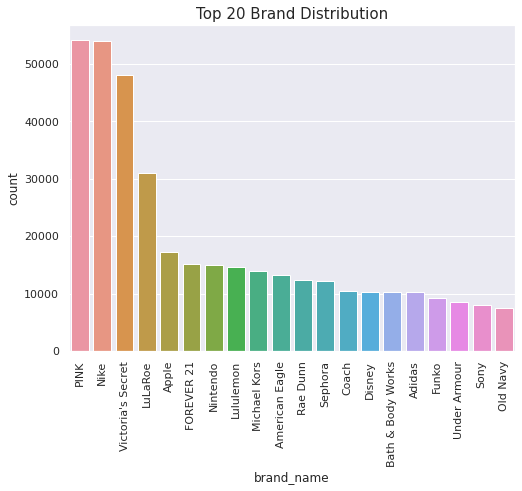

In [0]:
b20 = train['brand_name'].value_counts()[0:20].reset_index().rename(columns={'index': 'brand_name', 'brand_name':'count'})
ax = sns.barplot(x="brand_name", y="count", data=b20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Top 20 Brand Distribution', fontsize=15)
plt.show()

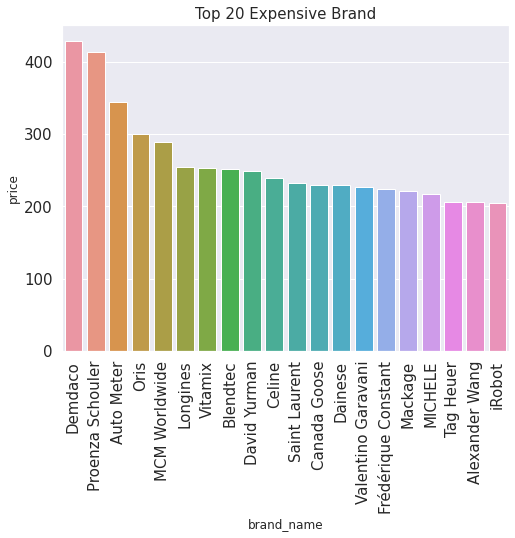

PINK                    0.063644
Nike                    0.063591
Victoria's Secret       0.056523
LuLaRoe                 0.036505
Apple                   0.020382
                          ...   
Osprey                  0.000001
Key                     0.000001
White Mountaineering    0.000001
Etonic                  0.000001
Natural Expressions     0.000001
Name: brand_name, Length: 4809, dtype: float64

In [0]:
# Display Top 20 Expensive Brands By Mean Price
top20_brand = train.groupby('brand_name', axis=0).mean()
df_expPrice = pd.DataFrame(top20_brand.sort_values('price', ascending = False)['price'][0:20].reset_index())


ax = sns.barplot(x="brand_name", y="price", data=df_expPrice)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=15)
ax.set_title('Top 20 Expensive Brand', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()# Displayd frequency ratio of brand names
train['brand_name'].value_counts(1)

**Category Distribution**

In [0]:
def transform_category_name(category_name):
    try:
        main, sub1, sub2= category_name.split('/')
        return main, sub1, sub2
    except:
        return np.nan, np.nan, np.nan

train['category_main'], train['category_sub1'], train['category_sub2'] = zip(*train['category_name'].apply(transform_category_name))

cat_train = train[['category_main','category_sub1','category_sub2', 'price']]

cat_train.head()

,category_main,category_sub1,category_sub2,price
0,Men,Tops,T-shirts,10.0
1,Electronics,Computers & Tablets,Components & Parts,52.0
2,Women,Tops & Blouses,Blouse,10.0
3,Home,Home Décor,Home Décor Accents,35.0
4,Women,Jewelry,Necklaces,44.0


In [0]:
train['category_main'].value_counts()

Women                     664385
Beauty                    207828
Kids                      171689
Electronics               119631
Men                        93363
Home                       67871
Vintage & Collectibles     46530
Other                      45351
Handmade                   30840
Sports & Outdoors          24331
Name: category_main, dtype: int64

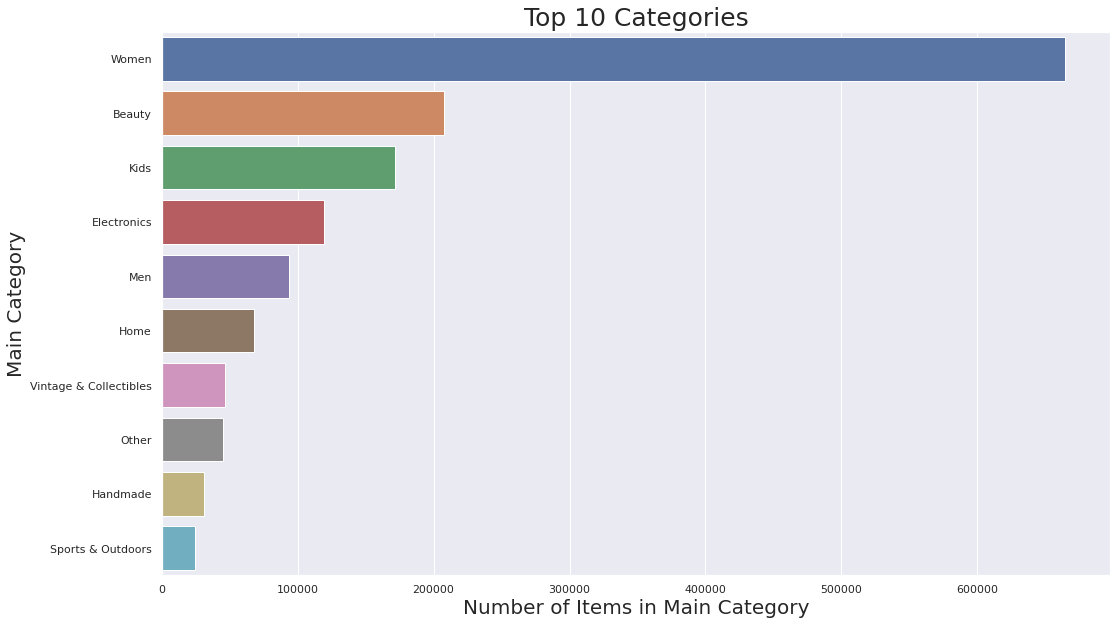

In [0]:
plt.figure(figsize=(17,10))
sns.countplot(y = train['category_main'], order = train['category_main'].value_counts().index, orient = 'v')
plt.title('Top 10 Categories', fontsize = 25)
plt.ylabel('Main Category', fontsize = 20)
plt.xlabel('Number of Items in Main Category', fontsize = 20)
plt.show()

In [0]:
train.groupby('category_main')['price'].describe()

,count,mean,std,min,25%,50%,75%,max
category_main,,,,,,,,
Beauty,207828.0,19.671536,21.360135,0.0,10.0,15.0,24.0,2000.0
Electronics,119631.0,34.191769,64.037637,0.0,9.0,15.0,30.0,1909.0
Handmade,30840.0,18.154410,27.756418,0.0,6.0,12.0,20.0,1750.0
Home,67871.0,24.536599,24.417061,0.0,12.0,18.0,29.0,848.0
Kids,171689.0,20.642315,22.730876,0.0,10.0,14.0,24.0,809.0
Men,93363.0,34.693347,41.264184,0.0,14.0,21.0,40.0,1309.0
Other,45351.0,20.809817,29.847758,0.0,9.0,14.0,23.0,1400.0
Sports & Outdoors,24331.0,25.534565,29.324018,0.0,11.0,16.0,28.0,915.0
Vintage & Collectibles,46530.0,27.339426,53.507495,0.0,10.0,16.0,27.0,1709.0


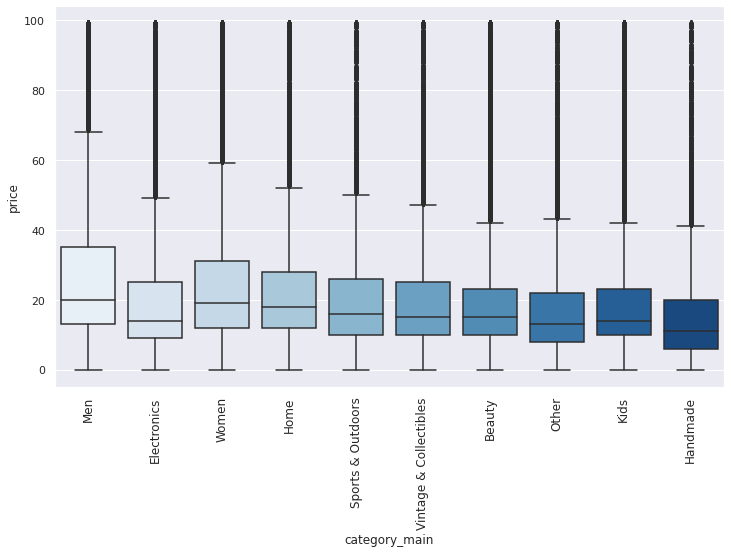

In [0]:
#main = pd.DataFrame(cat_train['category_main'].value_counts()).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
fig, axes = plt.subplots(figsize=(12, 7))
main = cat_train[cat_train["price"]<100]
# Use a color palette
ax = sns.boxplot( x=main["category_main"], y=main["price"], palette="Blues")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, fontsize=12)
plt.show()

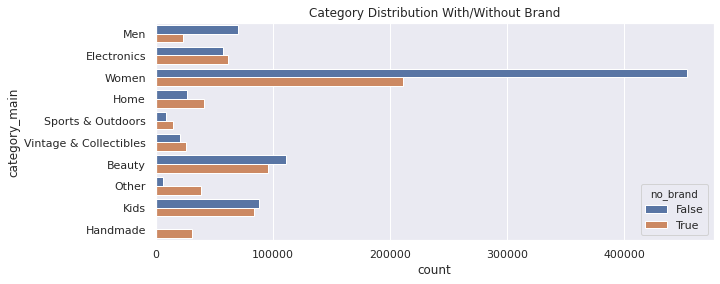

In [0]:
# Create a "no_brand" column 
train['no_brand'] = train['brand_name'].isnull()
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(y='category_main', hue='no_brand', data=train).set_title('Category Distribution With/Without Brand');
plt.show()

**Category_1 Distribution**

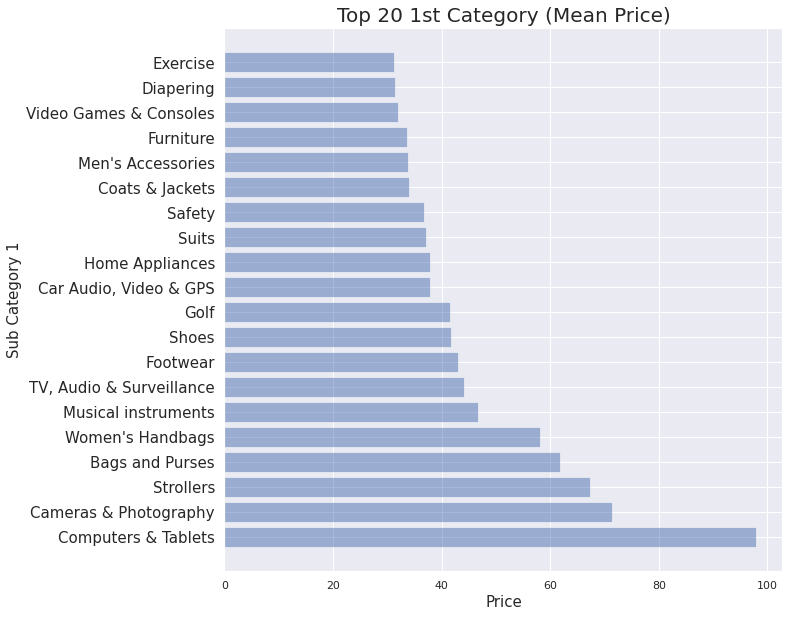

In [0]:
df = cat_train.groupby(['category_sub1'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False)[0:20]

plt.figure(figsize=(10, 10))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='b')
plt.yticks(range(0,len(df)), df['category_sub1'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 1', fontsize=15)
plt.title('Top 20 1st Category (Mean Price)', fontsize=20)
plt.show()

**Category_2 Distribution**

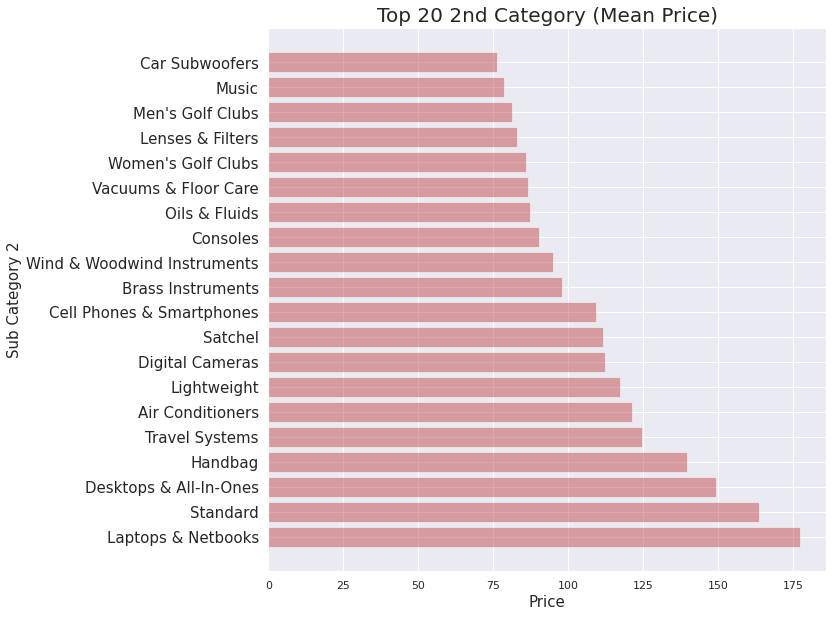

In [0]:
df = cat_train.groupby(['category_sub2'])['price'].agg(['mean']).reset_index().rename(columns={'index': 'main', 'category_main':'count'})
df= df.sort_values('mean', ascending=False).head(20)

plt.figure(figsize=(10, 10))
plt.barh(range(0,len(df)), df['mean'], align='center', alpha=0.5, color='r')
plt.yticks(range(0,len(df)), df['category_sub2'], fontsize=15)

plt.xlabel('Price', fontsize=15)
plt.ylabel('Sub Category 2', fontsize=15)
plt.title('Top 20 2nd Category (Mean Price)', fontsize=20)
plt.show()

In [0]:
# Distribution of target variable 
sns.distplot(train['price'])

In [0]:
print("Skewness: %f" % train['price'].skew())
print("Kurtosis: %f" % train['price'].kurt())

Skewness: 11.393232
Kurtosis: 283.821669


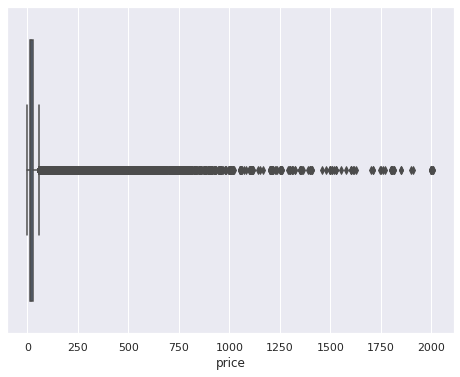

In [0]:
sns.boxplot(x=train['price'])

Skewness is 0.6594232018807694


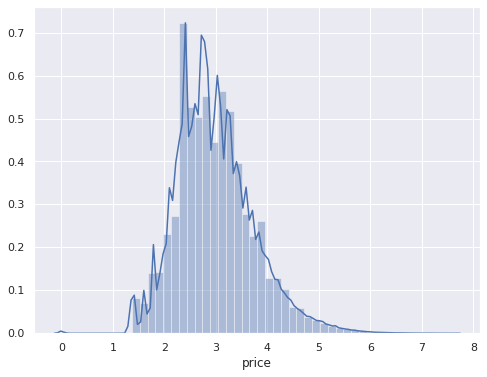

In [0]:
#now transforming the target variable
target= np.log((train['price']+1))
print('Skewness is', target.skew())
sns.distplot(target)

Text(0.5, 1.0, 'Price Distribution')

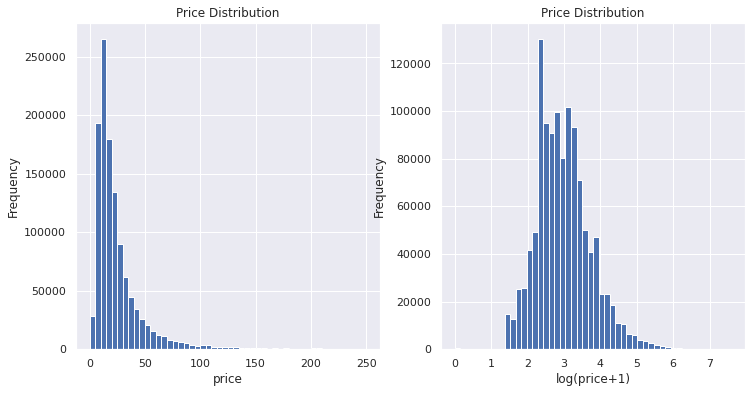

In [0]:
plt.subplot(1, 2, 1)
(train['price']).plot.hist(bins=50, figsize=(12, 6), edgecolor = 'white', range = [0, 250])
plt.xlabel('price', fontsize=12)
plt.title('Price Distribution', fontsize=12)

plt.subplot(1, 2, 2)
np.log(train['price']+1).plot.hist(bins=50, figsize=(12,6), edgecolor='white')
plt.xlabel('log(price+1)', fontsize=12)
plt.title('Price Distribution', fontsize=12)

In [0]:
train['shipping'].value_counts() / len(train)

0    0.552755
1    0.447245
Name: shipping, dtype: float64

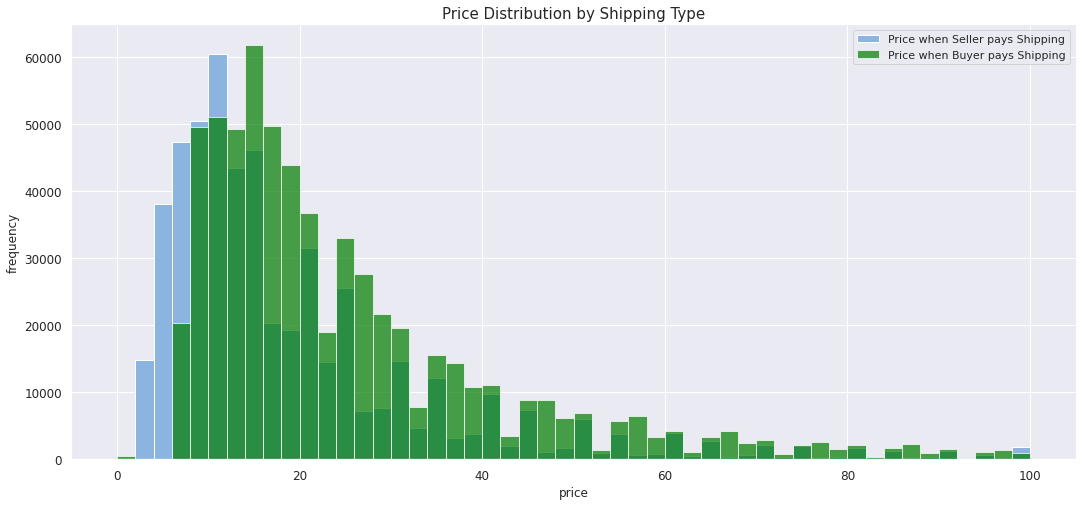

In [0]:

shipping_fee_by_buyer = train.loc[df['shipping'] == 0, 'price']
shipping_fee_by_seller = train.loc[df['shipping'] == 1, 'price']

fig, ax = plt.subplots(figsize=(18,8))
ax.hist(shipping_fee_by_seller, color='#8CB4E1', alpha=1.0, bins=50, range = [0, 100],
       label='Price when Seller pays Shipping')
ax.hist(shipping_fee_by_buyer, color='#007D00', alpha=0.7, bins=50, range = [0, 100],
       label='Price when Buyer pays Shipping')
plt.xlabel('price', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

In [0]:
print('The average price is {}'.format(round(shipping_fee_by_seller.mean(), 2)), 'if seller pays shipping');
print('The average price is {}'.format(round(shipping_fee_by_buyer.mean(), 2)), 'if buyer pays shipping')

The average price is 22.52 if seller pays shipping
The average price is 30.14 if buyer pays shipping


**Now comparing shippig after taking log price**

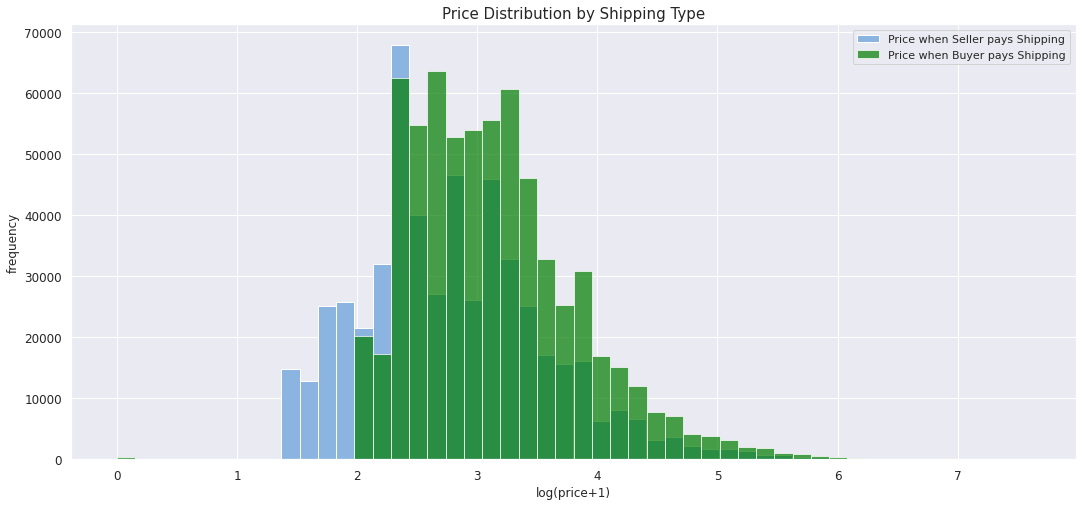

In [0]:
fig, ax = plt.subplots(figsize=(18,8))
ax.hist(np.log(shipping_fee_by_seller+1), color='#8CB4E1', alpha=1.0, bins=50,
       label='Price when Seller pays Shipping')
ax.hist(np.log(shipping_fee_by_buyer+1), color='#007D00', alpha=0.7, bins=50,
       label='Price when Buyer pays Shipping')
plt.xlabel('log(price+1)', fontsize=12)
plt.ylabel('frequency', fontsize=12)
plt.title('Price Distribution by Shipping Type', fontsize=15)
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

**Item condition vs Price**

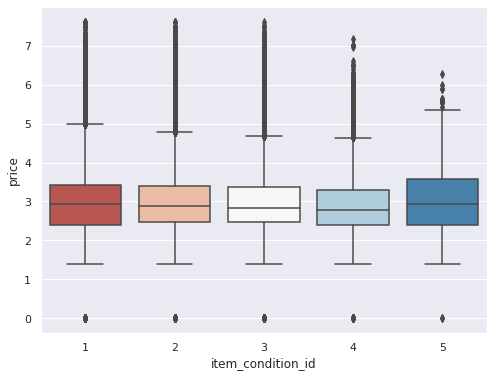

In [0]:

sns.boxplot(x = 'item_condition_id', y = np.log(train['price']+1), data = train, palette = sns.color_palette('RdBu',5))

In [0]:
NUM_BRANDS = 4809
NUM_CATEGORIES = 1287
NAME_MIN_DF = 10
MAX_FEATURES_ITEM_DESCRIPTION = 3

https://towardsdatascience.com/machine-learning-for-retail-price-suggestion-with-python-64531e64186d
https://www.kaggle.com/tunguz/more-effective-ridge-lgbm-script-lb-0-44823
https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Mercari%20Price%20Suggestion%20Lightgbm.ipynb

**Missing Value Treamtment and Price Prediction on Item Description**

In [0]:
def handle_missing_inplace(dataset):
    dataset['category_name'].fillna(value='missing', inplace=True)
    dataset['brand_name'].fillna(value='missing', inplace=True)
    dataset['item_description'].fillna(value='missing', inplace=True)

def cutting(dataset):
    pop_brand = dataset['brand_name'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_BRANDS]
    dataset.loc[~dataset['brand_name'].isin(pop_brand), 'brand_name'] = 'missing'
    pop_category = dataset['category_name'].value_counts().loc[lambda x: x.index != 'missing'].index[:NUM_BRANDS]
    dataset.loc[~dataset['category_name'].isin(pop_category), 'category_name'] = 'missing'

def to_categorical(dataset):
    dataset['category_name'] = dataset['category_name'].astype('category')
    dataset['brand_name'] = dataset['brand_name'].astype('category')
    dataset['item_condition_id'] = dataset['item_condition_id'].astype('category')


def main():
    start_time = time.time()

    train = pd.read_table('../input/train.tsv', engine='c')
    test = pd.read_table('../input/test.tsv', engine='c')
    print('[{}] Finished to load data'.format(time.time() - start_time))
    print('Train shape: ', train.shape)
    print('Test shape: ', test.shape)

    nrow_train = train.shape[0]
    y = np.log1p(train["price"])
    merge: pd.DataFrame = pd.concat([train, test])
    submission: pd.DataFrame = test[['test_id']]

    del train
    del test
    gc.collect()

    handle_missing_inplace(merge)
    print('[{}] Finished to handle missing'.format(time.time() - start_time))

    cutting(merge)
    print('[{}] Finished to cut'.format(time.time() - start_time))

    to_categorical(merge)
    print('[{}] Finished to convert categorical'.format(time.time() - start_time))

    cv = CountVectorizer(min_df=NAME_MIN_DF)
    X_name = cv.fit_transform(merge['name'])
    print('[{}] Finished count vectorize `name`'.format(time.time() - start_time))

    cv = CountVectorizer()
    X_category = cv.fit_transform(merge['category_name'])
    print('[{}] Finished count vectorize `category_name`'.format(time.time() - start_time))

    tv = TfidfVectorizer(max_features=MAX_FEATURES_ITEM_DESCRIPTION,
                         ngram_range=(1, 3),
                         stop_words='english')
    X_description = tv.fit_transform(merge['item_description'])
    print('[{}] Finished TFIDF vectorize `item_description`'.format(time.time() - start_time))

    lb = LabelBinarizer(sparse_output=True)
    X_brand = lb.fit_transform(merge['brand_name'])
    print('[{}] Finished label binarize `brand_name`'.format(time.time() - start_time))

    X_dummies = csr_matrix(pd.get_dummies(merge[['item_condition_id', 'shipping']],
                                          sparse=True).values)
    print('[{}] Finished to get dummies on `item_condition_id` and `shipping`'.format(time.time() - start_time))

    sparse_merge = hstack((X_dummies, X_description, X_brand, X_category, X_name)).tocsr()
    print('[{}] Finished to create sparse merge'.format(time.time() - start_time))

    X = sparse_merge[:nrow_train]
    X_test = sparse_merge[nrow_train:]
    
    #train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size = 0.1, random_state = 144) 
    d_train = lgb.Dataset(X, label=y)
    #d_valid = lgb.Dataset(valid_X, label=valid_y, max_bin=8192)
    #watchlist = [d_train, d_valid]
    
    params = {
        'learning_rate': 0.75,
        'application': 'regression',
        'max_depth': 3,
        'num_leaves': 100,
        'verbosity': -1,
        'metric': 'RMSE',
    }


    model = lgb.train(params, train_set=d_train, num_boost_round=3200, verbose_eval=100) 
    preds = 0.57*model.predict(X_test)


    model = Ridge(solver="sag", fit_intercept=True, random_state=205)
    model.fit(X, y)
    print('[{}] Finished to train ridge'.format(time.time() - start_time))
    preds += 0.43*model.predict(X=X_test)
    print('[{}] Finished to predict ridge'.format(time.time() - start_time))


    submission['price'] = np.expm1(preds)
    submission.to_csv("submission_lgbm_ridge_5.csv", index=False)

if __name__ == '__main__':
    main()